In [1045]:
# Loading Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Stats Modules
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [1046]:
# Read the data
data_raw = pd.read_csv('day.csv')
print(data_raw.columns)
data_raw.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1047]:
#Inspect the data
print(data_raw.shape)
data_raw.info()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1048]:
# Describe the numerical Columns
data_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1049]:
# First Split the data into training and test set
# The reason for this is preparing the training set by doing proper EDA on it.. And leaving the test set to its original form
#Later changing the test set according to the changes we have done in training set

# X variables
X = data_raw.drop('cnt',axis = 1)
Y = data_raw[['cnt']].values

X_Train, X_Test , Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.3, random_state = 150)

print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

# For now, merge X and Y together and separate it later again

train_df = pd.DataFrame(np.concatenate([X_Train,Y_Train],axis = 1),columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'])
test_df = pd.DataFrame(np.concatenate([X_Test,Y_Test],axis = 1),columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'])
train_df.head()

(511, 15)
(219, 15)
(511, 1)
(219, 1)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,727,28-12-2019,1,1,12,0,5,1,2,10.3867,12.7523,59,10.4166,644,2451,3095
1,590,13-08-2019,3,1,8,0,1,1,1,29.5542,33.1127,54.5417,9.1262,1207,5676,6883
2,61,02-03-2018,1,0,3,0,3,1,1,13.735,16.0036,44.9583,20.6248,231,1903,2134
3,262,19-09-2018,3,0,9,0,1,1,2,22.5158,26.4838,69,10.1667,691,3848,4539
4,609,01-09-2019,3,1,9,0,6,0,2,30.8867,35.1327,63.8333,7.58353,2352,3788,6140


In [1050]:
# Inspecting each and every column one by one of train dataset 
# Also create a list for dropped columns of train dataset so that the columns can be removed from test data as well

dropped_columns = []
#Lets begin with instant
# Since its just an index, we can just remove it

cleaned_train_df = train_df.drop(['instant'],axis = 1)
dropped_columns.append('instant')
cleaned_train_df.shape

(511, 15)

In [1051]:
# dteday - Date 
# Since we already have year, month, week and season info, we might not this column anymore
# Dropping the column

cleaned_train_df = cleaned_train_df.drop('dteday',axis = 1)
dropped_columns.append('dteday')
cleaned_train_df.shape

(511, 14)

Text(0.5, 1.0, 'year 2019 Trends')

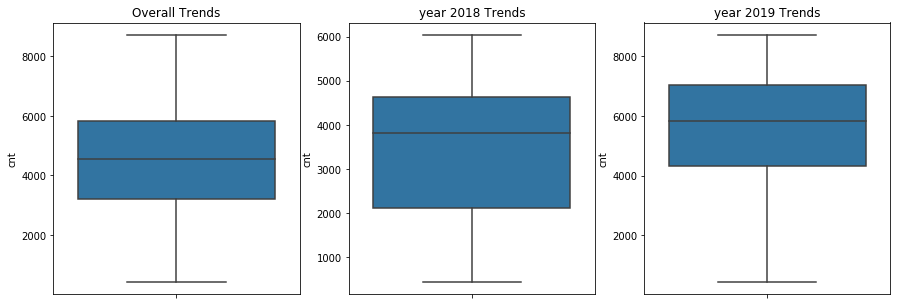

In [1052]:
# cnt variable
# Lets see its distribution and see if it contains any outliers
fig,axes = plt.subplots(1, 3,figsize=(15,5))

sns.boxplot(y='cnt',data = cleaned_train_df,ax=axes[0] )
axes[0].set_title('Overall Trends')

sns.boxplot(y='cnt',data = cleaned_train_df[cleaned_train_df['yr']==0], ax=axes[1] )
axes[1].set_title('year 2018 Trends')

sns.boxplot(y='cnt',data = cleaned_train_df[cleaned_train_df['yr']==1],ax=axes[2] )
axes[2].set_title('year 2019 Trends')


# It does not contains any outlier and hence it seems fine

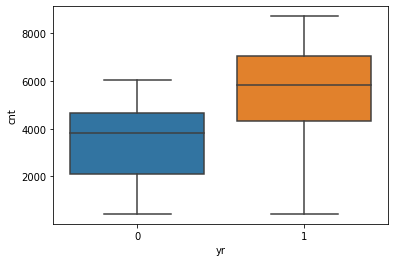

In [1053]:
# Yr - Year of analysis - (0: 2018, 1:2019)
# Plot a boxplot of cnt with the 2 years present
sns.boxplot(x='yr',y='cnt',data = cleaned_train_df )

# It can be clearly seen that the demand increased in 2019 as comapred to 2018 and hence it can be a significant variable

Text(0.5, 1.0, 'year 2019 Trends')

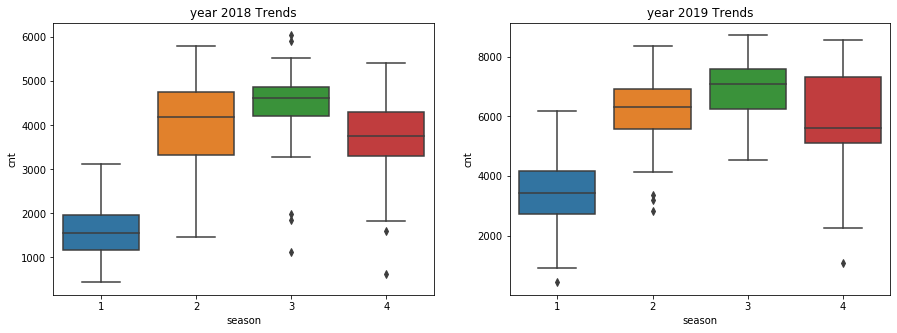

In [1054]:
# season - All the four seasons (1:spring, 2:summer, 3:fall, 4:winter)
# It will be better to comapre the seasons of 2018 and 2019 seperatetely because the avg of cnt increased in 2019 and this might skew the results
# Plot a boxplot of cnt with all the four variables
fig,axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='season',y='cnt',data = cleaned_train_df[cleaned_train_df['yr']==0], ax=axes[0] )
axes[0].set_title('year 2018 Trends')


sns.boxplot(x='season',y='cnt',data = cleaned_train_df[cleaned_train_df['yr']==1],ax=axes[1] )
axes[1].set_title('year 2019 Trends')

# The trend seems to be the same in 2018 and 2019. 
# Demand is higher in summer and fall season as compared to the other 2 season
# the distribution of demand in summer has changed though. 
# The variable is significant

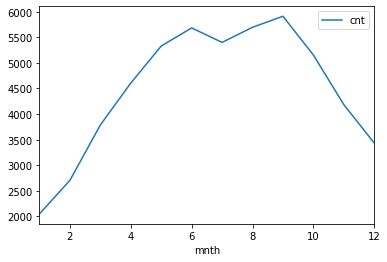

In [1055]:
#mnth
# Lets Visualise the avg trends over month
# Calculating the avg of cnt over month
cleaned_train_df['cnt'] = cleaned_train_df['cnt'].astype('float')
month_df = cleaned_train_df.pivot_table(index = 'mnth',values = 'cnt',aggfunc = 'mean').reset_index()
month_df.plot.line(x='mnth', y='cnt')

# Months 5 to 9 see a higher demand of vehicles.. This month is also very significant

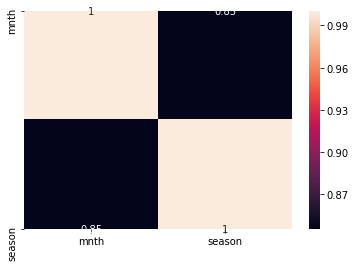

In [1056]:
# Lets try and see if there is any correaltion between month and season

month_season_df = cleaned_train_df[['mnth','season']].astype(float)
sns.heatmap(month_season_df.corr(),annot = True)

# There is a very high correlation between month and season.. Hence for simplicity we will remove month from it and will keep only season
#83% Correlation

cleaned_train_df = cleaned_train_df.drop('mnth',axis = 1)

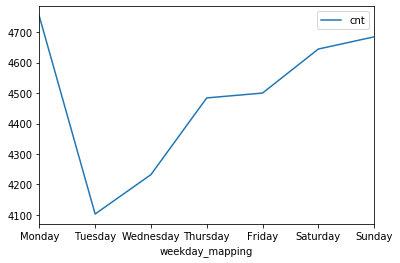

In [1057]:
# weekday 
# Lets Visualise the avg trends over weekday
# Calculating the avg of cnt over week
# Map the weekday to proper day of week
cats  = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_mapping = {0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'}
cleaned_train_df['weekday_mapping'] = cleaned_train_df['weekday'].map(weekday_mapping)
weekday_df = cleaned_train_df.pivot_table(index = 'weekday_mapping',values = 'cnt',aggfunc = 'mean').reset_index()
weekday_df['weekday_mapping'] = pd.Categorical(weekday_df['weekday_mapping'], categories=cats, ordered=True)
weekday_df = weekday_df.sort_values('weekday_mapping')
weekday_df.plot.line(x='weekday_mapping', y='cnt')

# It can be seen that the demand is much higher on weekends and rises gradually over the week

0    494
1     17
Name: holiday, dtype: int64


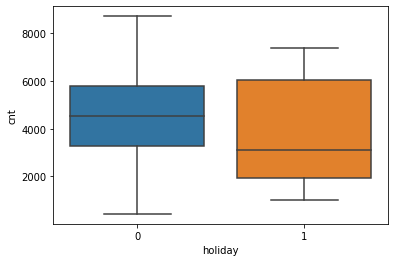

In [1058]:
# holiday - 1: yes 0:no
# Check the demand based on holiday status
print(cleaned_train_df['holiday'].value_counts())
sns.boxplot(x='holiday',y='cnt',data = cleaned_train_df )
#Ideally the demand on holiday should be more as compared to not a holiday. But Data shows opposite trends
# Doubtful whether to use this varible or not. Lets inspect later while building model

1    353
0    158
Name: workingday, dtype: int64


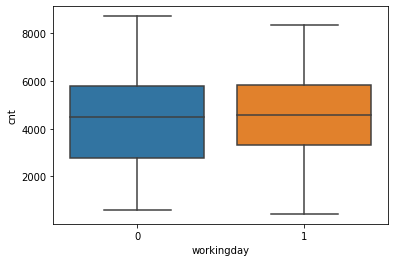

In [1059]:
#workingday
print(cleaned_train_df['workingday'].value_counts())
sns.boxplot(x='workingday',y='cnt',data = cleaned_train_df )

# This variable captures the effect of both weekday/weekend and holiday/not holiday.. Hence we will try to keep it instead of the other two

1    319
2    180
3     12
Name: weathersit, dtype: int64


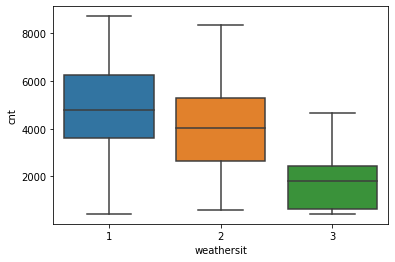

In [1060]:
#weathersit
# Lets draw a boxplot to see the distribution of cnt with the four categories
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
print(cleaned_train_df['weathersit'].value_counts())
sns.boxplot(x='weathersit',y='cnt',data = cleaned_train_df )

# As expected , if the weather is clear, the demand is more as compared to when the weather is rainy or stormy 
# No data for 4th category although its mentioned in the data dictionary

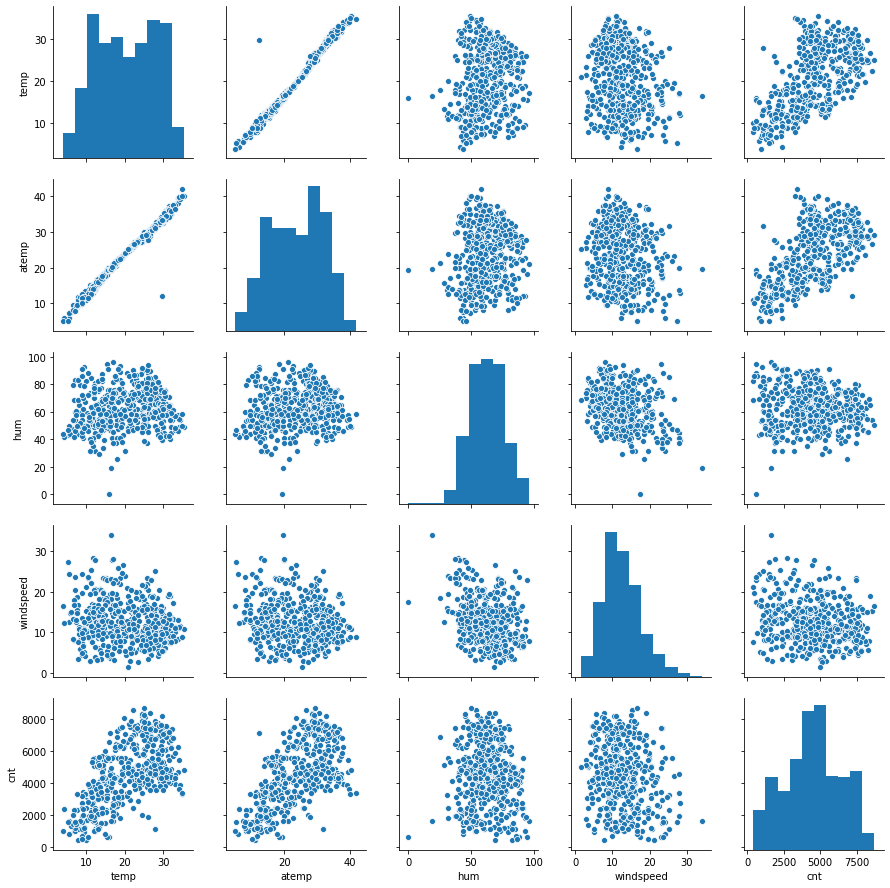

In [1061]:
# Numerical Variables like temp, atemp humidity and windspeed
# Lets plot a pairplot to see the correlation
sns.pairplot(cleaned_train_df[['temp','atemp','hum','windspeed','cnt']])

# Temp and atemp are highly correalted.. Hence keep temp(as it can be easily measured and more obvious variable) and remove atemp

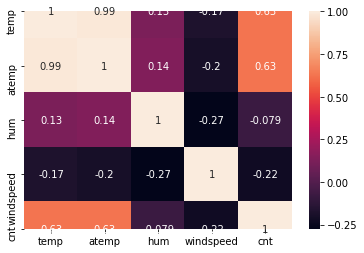

In [1062]:
# Correaltion Plots
cleaned_train_df[['temp','atemp','hum','windspeed']] = cleaned_train_df[['temp','atemp','hum','windspeed']].astype(float)
sns.heatmap(cleaned_train_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot = True)

# Temp and cnt shows some good correlation

In [1063]:
# Inspecting the 4 weather related numerical columns
#atemp - Remove it since its highly correlated with temp
cleaned_train_df = cleaned_train_df.drop('atemp',axis = 1)


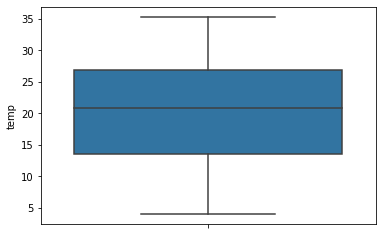

In [1064]:
# Temp 
# Plot boxlplot to see dist
sns.boxplot(y='temp',data = cleaned_train_df)
# No Outlier

Text(0.5, 1.0, 'After removing outlier')

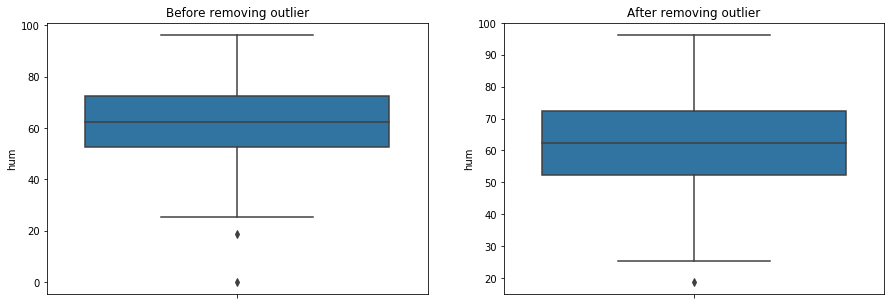

In [1065]:
# Humidity
# Plot boxlplot to see dist
fig,axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(y='hum',data = cleaned_train_df,ax = axes[0])
axes[0].set_title('Before removing outlier')
# 1 outlier value.. Lets change it to the next min value(25.4167) and see the distribution
cleaned_train_df['hum'] = cleaned_train_df['hum'].apply(lambda x: 25.4167 if x==0 else x )
sns.boxplot(y='hum',data = cleaned_train_df,ax = axes[1])
axes[1].set_title('After removing outlier')

Text(0.5, 1.0, 'After outlier treatment')

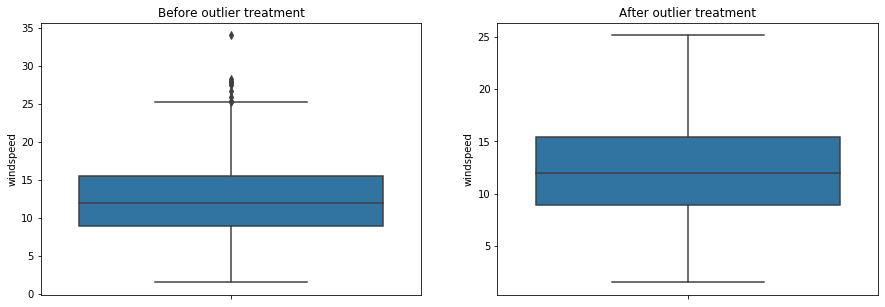

In [1066]:
#windspeed
fig,axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(y='windspeed',data = cleaned_train_df,ax = axes[0])
axes[0].set_title('Before outlier treatment')

# Find Upper Wisker Value
data = cleaned_train_df['windspeed']
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()

# Lets cap the value at upper wisker for outlier treatment
cleaned_train_df['windspeed'] =  cleaned_train_df['windspeed'].apply(lambda x: upper_whisker if x>upper_whisker else x )
sns.boxplot(y='windspeed',data = cleaned_train_df,ax = axes[1])
axes[1].set_title('After outlier treatment')

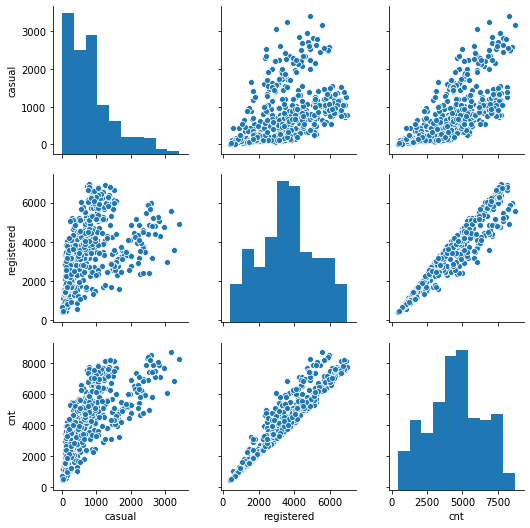

In [1067]:
# Considering relationship of 'casual' and 'registered' with 'cnt'
target_similar_df = cleaned_train_df[['casual','registered','cnt']]
sns.pairplot(target_similar_df)

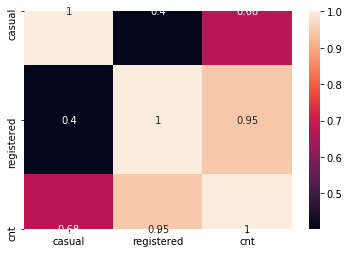

In [1068]:
target_similar_df = target_similar_df.astype(float)
sns.heatmap(target_similar_df.corr(),annot = True)
# As the 3 variables are exactly linearly dependent, there is no meaning of keeping the other two varible in the model.
#'casual'+ 'registered'=cnt
# Hence if we will predict cnt, we will be able to predict the other two as well

cleaned_train_df = cleaned_train_df.drop(['casual','registered'],axis =1)

In [1069]:
# Prepare a dataframe for model building

model_train_dataframe = cleaned_train_df.copy()
print(model_train_dataframe.shape)
print(model_train_dataframe.columns)

(511, 11)
Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt', 'weekday_mapping'],
      dtype='object')


In [1070]:
# Create dummy variable for season,weekday,weathersit
# Seasons
season = pd.get_dummies(model_train_dataframe['season'], drop_first = True)
season.columns = ['season_summer','season_fall','season_winter']
model_train_dataframe = pd.concat([model_train_dataframe, season], axis = 1)
model_train_dataframe.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_mapping,season_summer,season_fall,season_winter
0,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095.0,Sunday,0,0,0
1,3,1,0,1,1,1,29.554153,54.5417,9.126204,6883.0,Wednesday,0,1,0
2,1,0,0,3,1,1,13.735000,44.9583,20.624811,2134.0,Friday,0,0,0
3,3,0,0,1,1,2,22.515847,69.0000,10.166714,4539.0,Wednesday,0,1,0
4,3,1,0,6,0,2,30.886653,63.8333,7.583529,6140.0,Monday,0,1,0


In [1071]:
#Weekday or weekend( Considering monday also in weekend because there was a peak during monday)

model_train_dataframe['weekend'] = model_train_dataframe['weekday_mapping'].apply(lambda x : 1 if x in ['Saturday','Sunday','Monday'] else 0)
model_train_dataframe.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_mapping,season_summer,season_fall,season_winter,weekend
0,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095.0,Sunday,0,0,0,1
1,3,1,0,1,1,1,29.554153,54.5417,9.126204,6883.0,Wednesday,0,1,0,0
2,1,0,0,3,1,1,13.735000,44.9583,20.624811,2134.0,Friday,0,0,0,0
3,3,0,0,1,1,2,22.515847,69.0000,10.166714,4539.0,Wednesday,0,1,0,0
4,3,1,0,6,0,2,30.886653,63.8333,7.583529,6140.0,Monday,0,1,0,1


In [1072]:
# Weathersit
weathersit = pd.get_dummies(model_train_dataframe['weathersit'], drop_first = True)
weathersit.columns = ['weather_mist','weather_light']
model_train_dataframe = pd.concat([model_train_dataframe, weathersit], axis = 1)
model_train_dataframe.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_mapping,season_summer,season_fall,season_winter,weekend,weather_mist,weather_light
0,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095.0,Sunday,0,0,0,1,1,0
1,3,1,0,1,1,1,29.554153,54.5417,9.126204,6883.0,Wednesday,0,1,0,0,0,0
2,1,0,0,3,1,1,13.735000,44.9583,20.624811,2134.0,Friday,0,0,0,0,0,0
3,3,0,0,1,1,2,22.515847,69.0000,10.166714,4539.0,Wednesday,0,1,0,0,1,0
4,3,1,0,6,0,2,30.886653,63.8333,7.583529,6140.0,Monday,0,1,0,1,1,0


In [1073]:
# Final Columns to select 
final_columns = ['yr', 'holiday', 'workingday',
        'temp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'season_fall', 'season_winter', 'weekend',
       'weather_mist', 'weather_light']

In [1074]:
final_training_df = model_train_dataframe[['yr', 'holiday', 'workingday',
        'temp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'season_fall', 'season_winter', 'weekend',
       'weather_mist', 'weather_light']]

In [1075]:
# Scaling some vaiables.. Use min max scaler
scaler = MinMaxScaler()
vars_to_scale = ['temp', 'hum', 'windspeed', 'cnt']
final_training_df[vars_to_scale] = scaler.fit_transform(final_training_df[vars_to_scale])
final_training_df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekend,weather_mist,weather_light
0,1,0,1,0.204943,0.519096,0.376755,0.321623,0,0,0,1,1,0
1,1,0,1,0.815938,0.461539,0.322231,0.778945,0,1,0,0,0,0
2,0,0,1,0.311677,0.337815,0.808100,0.205602,0,0,0,0,0,0
3,0,0,1,0.591581,0.648198,0.366198,0.495956,0,1,0,0,1,0
4,1,0,0,0.858414,0.581495,0.257046,0.689243,0,1,0,1,1,0


In [1076]:
# Dividing into independent and dependent variables
y_train = final_training_df['cnt']
X_train = final_training_df.drop('cnt',axis = 1)
X_train.shape

(511, 12)

### Model Building Starts
### RFE Model

In [1077]:
# Build our model using Recursive feature elimination (RFE) Method
# Initially lets consider 10 top variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1078]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weekend', False, 2),
 ('weather_mist', True, 1),
 ('weather_light', True, 1)]

In [1079]:
print(X_train.columns[rfe.support_])
print(X_train.columns[~rfe.support_])
# Year, temp, humidity season and weather play a significant role in the prediction

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'weather_mist', 'weather_light'],
      dtype='object')
Index(['workingday', 'weekend'], dtype='object')


### Model Trail 1

In [1080]:
# Building the model using statsmodel api
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [1081]:
X_train_rfe = X_train_rfe.astype(float)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

# P values of all the variables are less than 0.005 hence it good
# Both R square and adjusted r square of the model is 0.82 which is also good


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          4.82e-179
Time:                        20:27:24   Log-Likelihood:                 458.87
No. Observations:                 511   AIC:                            -895.7
Df Residuals:                     500   BIC:                            -849.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1545      0.025      6.202

In [1082]:
# Calcuate the VIF of the variables of the new models
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Since vif is not less than 5 for every variable, we need to remove some variables to remove multi colearity

,Features,VIF
2,temp,19.13
3,hum,11.11
6,season_fall,6.45
4,windspeed,3.79
5,season_summer,3.75
7,season_winter,2.44
8,weather_mist,2.27
0,yr,1.92
9,weather_light,1.19
1,holiday,1.04


### Model Trail 2

In [1099]:
# Since the VIF of temp is very high, lets remove some variables and see if any change comes
#remove humidity and see the model again
# We will not remove temp here because the r square reduces significantly
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'weather_mist', 'weather_light']
col1 = col.copy()
col1.append('cnt')
X_train_rfe2 = X_train[col]

# Adding constant
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [1100]:
X_train_rfe2 = X_train_rfe2.astype(float)
lm = sm.OLS(y_train,X_train_rfe2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.22e-177
Time:                        20:33:08   Log-Likelihood:                 452.71
No. Observations:                 511   AIC:                            -885.4
Df Residuals:                     501   BIC:                            -843.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0956      0.019      5.154

In [1101]:
# Calcuate the VIF of the variables of the new models
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe2[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Since vif is not less than 5 for every variable, we need to remove some more variables

,Features,VIF
2,temp,14.47
5,season_fall,6.31
4,season_summer,3.74
3,windspeed,3.45
6,season_winter,2.35
0,yr,1.91
7,weather_mist,1.50
8,weather_light,1.07
1,holiday,1.04


### Model Trail 3


In [1169]:
# Still the VIF of temp and season_fall is high.. So lets drop season_fall variable and see the model
col = ['yr', 'temp', 'season_winter', 'weather_light','season_summer','weather_mist','holiday','windspeed']
col1 = col.copy()
col1.copy()
X_train_rfe3 = X_train[col]

# Adding constant
X_train_rfe3 = sm.add_constant(X_train_rfe3)


In [1170]:
X_train_rfe3 = X_train_rfe3.astype(float)
lm = sm.OLS(y_train,X_train_rfe3).fit() 
print(lm.summary())

# P values of all the variables are less than 0.005 hence it good
# Both R square and adjusted r square of the model is 0.81 which is also good

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          5.07e-174
Time:                        20:41:30   Log-Likelihood:                 441.30
No. Observations:                 511   AIC:                            -864.6
Df Residuals:                     502   BIC:                            -826.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0822      0.019      4.386

In [1171]:
# Calcuate the VIF of the variables of the new models
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe3[col]

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Since vif is less than 5 for every variable, lets keep it as our final model
# 8 variables selected 
#col = ['yr', 'temp', 'season_winter', 'weather_light','season_summer','weather_mist','holiday','windspeed']

,Features,VIF
7,windspeed,3.28
1,temp,3.27
0,yr,1.90
4,season_summer,1.53
5,weather_mist,1.50
2,season_winter,1.37
3,weather_light,1.07
6,holiday,1.03


In [1172]:
# Make predictions
y_train_pred = lm.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

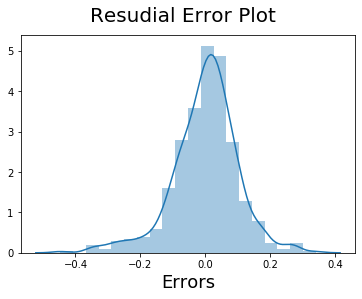

In [1173]:
#Resudial Analysis on train data
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Resudial Error Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

# The plot follows normal distribution with 0 mean and constant variance.. Hence it seems fine

### Testing the model Starts

In [1174]:
# Preparing the test set similar to training set
final_test_df  = test_df.copy()

In [1175]:
# Create Dummies
# Seasons
season = pd.get_dummies(final_test_df['season'], drop_first = True)
season.columns = ['season_summer','season_fall','season_winter']
final_test_df = pd.concat([final_test_df, season], axis = 1)


#Weekday or weekend
cats  = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_mapping = {0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'}
final_test_df['weekday_mapping'] = final_test_df['weekday'].map(weekday_mapping)
final_test_df['weekend'] = final_test_df['weekday_mapping'].apply(lambda x : 1 if x in ['Saturday','Sunday','Monday'] else 0)


# Weathersit
weathersit = pd.get_dummies(final_test_df['weathersit'], drop_first = True)
weathersit.columns = ['weather_mist','weather_light']
final_test_df = pd.concat([final_test_df, weathersit], axis = 1)

In [1176]:
# Scaling some vaiables.. Use min max scaler
vars_to_scale = ['temp', 'hum', 'windspeed', 'cnt']
final_test_df[vars_to_scale] = scaler.transform(final_test_df[vars_to_scale])

In [1177]:
# Final Variables for model prediction
final_test_df2 = final_test_df[['yr', 'temp', 'season_winter', 'weather_light','season_summer','weather_mist','holiday','cnt','windspeed']]

In [1178]:
final_test_df2 = final_test_df2.astype('float')
y_test = final_test_df2['cnt']
X_test = final_test_df2[['yr', 'temp', 'season_winter', 'weather_light','season_summer','weather_mist','holiday','windspeed']]
X_test = sm.add_constant(X_test)

In [1179]:
# Making predictions
y_test_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

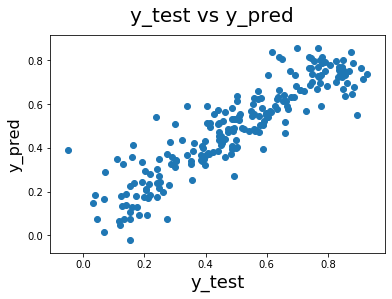

In [1180]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1181]:
# MSE and R2 Score Calculations
from sklearn.metrics import mean_squared_error, r2_score
mse_training = mean_squared_error(y_train, y_train_pred)
mse_testing = mean_squared_error(y_test, y_test_pred)
r_squared_training = r2_score(y_train, y_train_pred)
r_squared_testing = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error_Training :' ,mse_training)
print('Mean_Squared_Error_Testing :' ,mse_testing)
print('r_square_training :',r_squared_training)
print('r_square_testing :',r_squared_testing)

Mean_Squared_Error_Training : 0.01040914776864742
Mean_Squared_Error_Testing : 0.010615511510448598
r_square_training : 0.8072174553449906
r_square_testing : 0.8097748637640281


In [962]:
# The 8 variables are considered in the final model
#They precisely explains the importance of temporal trends(year), seasonal trends, weather condtions(temp, windspeed, weathersit) 
# and effect of holiday

In [ ]:
# R square Value of test set is 80.9%

0.03856749311294766